In [ ]:
### Check GPU ###

!nvidia-smi

Thu May 16 18:59:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              14W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
### Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
### Define root directory ###

ROOT_DIR = '/content/gdrive/MyDrive/YOLOv8/Industry_Safety_Gear_Dataset'

In [ ]:
### Install Ultralytics ###

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 17.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
### Train model ###

import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=600)  # train the model


100%|██████████| 6.23M/6.23M [00:00<00:00, 129MB/s]


Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/YOLOv8/data.yaml, epochs=600, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/gdrive/MyDrive/YOLOv8/data/labels/train... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [01:59<00:00,  1.01it/s]

train: New cache created: /content/gdrive/MyDrive/YOLOv8/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/YOLOv8/data/labels/val... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:40<00:00,  1.31s/it]

val: New cache created: /content/gdrive/MyDrive/YOLOv8/data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 600 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/600       2.5G      2.048      4.012      1.786         46        640: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         31        101    0.00389      0.282     0.0145    0.00793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/600      2.18G      1.733      3.547      1.582         78        640: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         31        101    0.00669      0.517      0.113     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/600      2.23G      1.768      2.697      1.519         71        640: 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         31        101    0.00989      0.657      0.182      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/600      2.17G      1.683      2.257      1.447         96        640: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         31        101       0.65      0.218      0.246      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/600       2.3G      1.668       2.04      1.449         67        640: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         31        101          1     0.0548      0.247      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/600       2.2G      1.586      1.773      1.396         63        640: 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         31        101      0.872     0.0997      0.204      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/600      2.21G      1.595      1.662      1.383         82        640: 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         31        101      0.761      0.233      0.331      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/600      2.17G       1.56      1.603      1.385         88        640: 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         31        101      0.758      0.269        0.4      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/600      2.21G      1.551      1.557      1.374         91        640: 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         31        101      0.677      0.362      0.465      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/600      2.31G      1.522      1.534      1.346         62        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         31        101      0.759      0.379      0.601      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/600      2.18G      1.494       1.47      1.353         66        640: 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         31        101      0.756      0.387      0.606      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/600      2.19G      1.443      1.383      1.325         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         31        101      0.619      0.553       0.66      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/600      2.28G      1.497      1.382       1.39         72        640: 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         31        101      0.562      0.596       0.67      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/600      2.19G      1.483      1.324      1.338        111        640: 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         31        101      0.546      0.584      0.633      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/600      2.18G      1.485      1.347       1.37         86        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         31        101      0.488      0.651      0.657      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/600      2.18G      1.454      1.286      1.336         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         31        101      0.694      0.625      0.665      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/600      2.19G      1.415        1.3      1.353         68        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         31        101      0.515      0.655       0.63      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/600      2.18G       1.46      1.259      1.318         95        640: 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         31        101      0.716      0.664      0.615      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/600      2.28G       1.43       1.27      1.313         64        640: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         31        101      0.824      0.541      0.614       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/600      2.17G      1.399      1.154      1.288         87        640: 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         31        101      0.729      0.546      0.595      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/600      2.17G      1.392      1.217      1.318         74        640: 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         31        101       0.79      0.522      0.614      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/600      2.19G       1.39      1.196        1.3         76        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         31        101      0.759      0.574      0.714      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/600      2.18G      1.408      1.194      1.325         50        640: 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         31        101      0.672      0.647      0.691      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/600      2.19G      1.385      1.123      1.275         74        640: 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         31        101      0.742      0.613      0.671      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/600      2.31G      1.335      1.118      1.268         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         31        101      0.723      0.707      0.689      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/600      2.21G      1.313       1.11      1.272         58        640: 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         31        101      0.685      0.698      0.734      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/600      2.18G      1.301      1.105       1.27        115        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         31        101      0.681      0.709       0.67       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/600      2.19G      1.321      1.036      1.237         53        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         31        101      0.715      0.635      0.706       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/600      2.25G      1.336      1.085      1.303         50        640: 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         31        101      0.596      0.777      0.758      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/600       2.3G       1.26      1.012      1.237         58        640: 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         31        101      0.643      0.769      0.741      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/600      2.21G      1.306     0.9985      1.247         88        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         31        101      0.695       0.66      0.752      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/600      2.17G      1.284      1.015      1.245         66        640: 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         31        101      0.661      0.673      0.735      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/600      2.19G      1.279      1.014      1.227         79        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         31        101      0.708      0.715      0.754      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/600      2.17G      1.227     0.9413        1.2         89        640: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         31        101      0.803      0.707      0.794      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/600      2.19G      1.212     0.9453      1.197         88        640: 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         31        101      0.742      0.754      0.796      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/600      2.17G      1.204     0.9789       1.21         70        640: 100%|██████████| 8/8 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         31        101      0.813      0.702      0.777      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/600      2.19G      1.259      0.998      1.232         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         31        101      0.686      0.738      0.778      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/600      2.19G      1.215      0.948      1.216         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         31        101      0.667      0.768      0.766      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/600      2.17G      1.207     0.9015       1.19         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         31        101       0.69       0.75       0.76      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/600      2.18G      1.269     0.9206      1.217         84        640: 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         31        101      0.846       0.66      0.742      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/600      2.17G      1.229     0.9317      1.199         75        640: 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         31        101      0.871       0.67      0.744      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/600      2.21G       1.17     0.8933      1.176         62        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         31        101      0.748      0.682      0.773      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/600       2.2G      1.196     0.9365       1.17         73        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         31        101       0.75      0.687      0.739      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/600      2.19G       1.21     0.9225      1.188         95        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         31        101      0.754      0.631      0.725       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/600      2.17G      1.127     0.8712      1.198         83        640: 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         31        101      0.728      0.688      0.726      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/600      2.28G      1.158     0.8796      1.171         75        640: 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         31        101      0.748      0.704      0.755      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/600      2.17G      1.166     0.8874      1.164         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         31        101      0.809      0.655      0.766      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/600      2.19G       1.17     0.8791       1.15         89        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         31        101      0.741      0.778      0.754      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/600      2.17G      1.189     0.8686      1.193         55        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         31        101      0.721      0.691      0.743      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/600      2.18G      1.202     0.8861      1.178         66        640: 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         31        101      0.653      0.643      0.698      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/600      2.19G      1.143     0.8463      1.155         82        640: 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         31        101      0.617      0.743       0.73        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/600      2.17G      1.146     0.8732      1.159         83        640: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         31        101      0.682      0.686      0.724      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/600      2.28G      1.145     0.8474      1.157         85        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         31        101      0.699      0.656      0.689      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/600      2.17G      1.146     0.8689       1.19         78        640: 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         31        101      0.816      0.621      0.732      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/600      2.18G       1.14     0.8161      1.147         71        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         31        101      0.834      0.694      0.756      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/600      2.19G      1.139      0.835      1.154         74        640: 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         31        101       0.69      0.672      0.773      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/600       2.2G      1.118     0.8172      1.133         49        640: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         31        101      0.702      0.713      0.787      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/600      2.17G      1.106     0.8076       1.14         69        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         31        101       0.76      0.674      0.736        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/600       2.2G      1.099     0.8061      1.127         69        640: 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         31        101       0.81      0.663      0.761      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/600      2.17G      1.108     0.8131       1.14         39        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         31        101      0.909      0.696      0.782      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/600      2.19G      1.093     0.7553      1.119         90        640: 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         31        101      0.793      0.765      0.778      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/600      2.18G      1.063     0.7695       1.12         62        640: 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         31        101      0.765       0.78      0.793      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/600      2.17G      1.056     0.7504      1.107         67        640: 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         31        101      0.763      0.744       0.78      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/600      2.29G      1.053     0.7839      1.102         52        640: 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         31        101      0.758      0.745      0.757       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/600      2.17G       1.04     0.7565      1.095         79        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         31        101      0.798      0.718      0.759      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/600      2.17G      1.053     0.7491      1.103         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         31        101      0.889      0.665       0.78      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/600      2.19G      1.081     0.7477      1.105         82        640: 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         31        101      0.749      0.702       0.78      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/600      2.31G      1.044     0.7242      1.097         61        640: 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         31        101      0.777      0.761      0.786      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/600       2.2G      1.034     0.7182      1.104         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         31        101      0.725      0.806      0.763      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/600      2.18G      1.059     0.7798      1.125         72        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         31        101      0.702      0.808      0.746      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/600      2.21G     0.9847     0.7012      1.055         92        640: 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         31        101      0.709       0.76      0.764      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/600      2.19G     0.9934     0.7061      1.076         61        640: 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         31        101      0.733      0.765       0.74      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/600      2.17G      1.026     0.6961      1.095         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         31        101      0.761      0.707      0.749      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/600      2.28G      1.035     0.7343      1.134         57        640: 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         31        101      0.781       0.68      0.777      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/600      2.28G      1.061     0.7098      1.106         86        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         31        101      0.695      0.775      0.782      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/600      2.28G      1.032     0.7274      1.105         67        640: 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         31        101      0.707      0.752      0.773      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/600      2.18G      1.001     0.7076       1.08         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         31        101      0.757      0.794      0.811      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/600      2.31G      1.011     0.7294      1.108         86        640: 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         31        101       0.77       0.73      0.811       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/600       2.2G       1.03     0.7004      1.105         99        640: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         31        101      0.873      0.709      0.812       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/600      2.19G      1.011     0.7094      1.102         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         31        101      0.907       0.67      0.779      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/600      2.21G      1.016     0.6979      1.084         65        640: 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         31        101      0.761      0.768      0.814      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/600      2.17G       0.98     0.6623      1.061         62        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         31        101      0.905      0.757      0.837       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/600      2.19G      1.024     0.6783      1.075         65        640: 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         31        101       0.88      0.783       0.82      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/600      2.28G      1.014     0.6872      1.094         85        640: 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         31        101      0.867      0.742      0.815      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/600      2.17G     0.9512     0.6514      1.059         71        640: 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         31        101      0.814        0.7       0.79      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/600      2.17G     0.9744     0.6564      1.057         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         31        101      0.766      0.715      0.809      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/600      2.22G      1.025     0.6848      1.083        103        640: 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         31        101      0.745      0.741      0.795      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/600       2.3G      1.011     0.6895      1.113         92        640: 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         31        101      0.832      0.785       0.83      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/600      2.18G     0.9446     0.6645      1.078         95        640: 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         31        101      0.809        0.8      0.833      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/600      2.18G      1.016     0.6551      1.095         88        640: 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         31        101      0.902       0.78      0.837      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/600       2.2G     0.9951     0.6467      1.094         87        640: 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         31        101      0.826      0.774      0.824      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/600      2.17G     0.9909     0.6792      1.084        119        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         31        101      0.902      0.722      0.804      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/600       2.2G     0.9601     0.6743      1.072         54        640: 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         31        101      0.726      0.779      0.804      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/600      2.19G     0.9555     0.6707      1.083         70        640: 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         31        101      0.847      0.739       0.83      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/600      2.18G     0.9531     0.6475      1.052        107        640: 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         31        101       0.81       0.78      0.835      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/600      2.19G     0.9713     0.6923      1.091         56        640: 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         31        101      0.823      0.709      0.815      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/600       2.2G      1.018     0.6588      1.078         45        640: 100%|██████████| 8/8 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         31        101      0.792      0.771      0.812      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/600       2.3G     0.9849      0.661      1.067         78        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         31        101      0.792      0.763      0.803      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/600       2.3G     0.9745     0.6443       1.09         89        640: 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         31        101       0.83        0.7      0.805      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/600      2.18G     0.9938      0.674      1.067         83        640: 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         31        101      0.725      0.726      0.772      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/600      2.19G     0.9451      0.652      1.053        111        640: 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         31        101      0.745      0.732       0.76      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/600      2.19G     0.9592      0.657      1.069         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         31        101      0.769      0.773      0.806      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/600       2.3G     0.9416      0.636      1.075         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         31        101      0.745        0.8      0.797      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/600       2.2G     0.9562      0.631       1.05        121        640: 100%|██████████| 8/8 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         31        101       0.76      0.742      0.746      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/600      2.19G     0.8995     0.6345      1.064         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         31        101       0.83      0.689      0.742       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/600      2.17G     0.9343      0.648      1.061         67        640: 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         31        101      0.769       0.74      0.782      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/600       2.3G     0.9649     0.6609      1.071         46        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         31        101      0.769      0.745      0.763      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/600      2.19G     0.9274     0.6434      1.052         61        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         31        101      0.749      0.778      0.773      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/600      2.28G     0.9319     0.6297      1.046         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         31        101      0.706      0.787      0.773      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/600       2.2G     0.8951     0.6216      1.048         62        640: 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         31        101      0.762      0.751      0.792      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/600      2.19G     0.9047     0.5942      1.035         83        640: 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         31        101      0.704      0.784      0.777       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/600       2.2G     0.9272     0.6038       1.04         51        640: 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         31        101      0.755      0.796      0.786      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/600      2.21G     0.9011     0.6269      1.044         71        640: 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         31        101        0.8      0.788      0.812      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/600      2.23G     0.9048     0.5881      1.017         76        640: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         31        101      0.814      0.811      0.818      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/600      2.28G     0.9326     0.6203      1.045         49        640: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         31        101      0.885      0.766      0.825      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/600      2.22G      0.891     0.6096      1.025         66        640: 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         31        101      0.806      0.759      0.801      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/600      2.28G     0.8377     0.5854      1.023         54        640: 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         31        101      0.836       0.77      0.817       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/600      2.24G     0.8831     0.5827      1.016         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         31        101      0.857      0.773      0.815      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/600       2.3G     0.8649      0.586       1.03         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         31        101      0.755      0.774      0.805      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/600      2.22G     0.8739     0.5928      1.026         58        640: 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         31        101      0.802      0.707      0.777      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/600      2.19G     0.8542     0.5779      1.012         77        640: 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         31        101       0.82      0.715      0.749      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/600      2.17G     0.8605     0.6033      1.037         84        640: 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         31        101      0.751      0.761       0.77      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/600       2.3G     0.8929     0.5923      1.053         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         31        101      0.791      0.685      0.792      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/600      2.28G     0.8558     0.5921      1.031         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         31        101      0.813      0.749      0.802      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/600      2.19G     0.8279     0.5745      1.009         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         31        101       0.88      0.702      0.813      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/600      2.17G     0.8719     0.5879      1.037         69        640: 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         31        101       0.81      0.751      0.819      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/600      2.28G     0.8877     0.5899       1.01         86        640: 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         31        101      0.814      0.713       0.82      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/600      2.28G     0.8354     0.5756      1.011         60        640: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         31        101      0.825      0.748       0.84      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/600      2.19G     0.8663     0.5917      1.034         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         31        101      0.868      0.694      0.832      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/600      2.18G     0.9075     0.5928      1.043         42        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         31        101      0.876      0.708      0.813      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/600      2.18G     0.8939     0.5914      1.037         75        640: 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         31        101      0.891      0.706      0.817      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/600      2.17G     0.8557      0.594       1.03         45        640: 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         31        101      0.766       0.77      0.809      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/600       2.2G     0.9083     0.5925      1.029         56        640: 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         31        101      0.784      0.767      0.793      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/600      2.21G     0.8427     0.5668      1.012         71        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         31        101      0.781      0.689      0.762       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/600      2.19G     0.8338     0.5426      0.994         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         31        101      0.791      0.737      0.776      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/600      2.28G     0.8488      0.555      1.016         62        640: 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         31        101      0.821      0.673      0.783       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/600      2.19G     0.8173     0.5504     0.9904         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         31        101      0.745       0.79      0.795      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/600      2.18G     0.8414     0.5613      1.008         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         31        101      0.778       0.74      0.783      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/600      2.19G     0.8607     0.5866      1.025         65        640: 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         31        101      0.836      0.701      0.789      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/600      2.17G     0.8568     0.5744      1.008         67        640: 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         31        101      0.827      0.711       0.79      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/600      2.28G     0.8568     0.5765      1.045         71        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         31        101      0.783      0.723      0.802      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/600      2.19G     0.9398      0.575      1.034         74        640: 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         31        101      0.798       0.66      0.785      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/600      2.17G      0.837     0.5351      1.001         63        640: 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         31        101      0.825      0.712      0.806      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/600       2.2G      0.856       0.55      1.003        102        640: 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         31        101      0.819      0.758      0.812      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/600      2.19G     0.8805     0.5717      1.031         63        640: 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         31        101       0.76      0.797      0.815      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/600      2.21G      0.831      0.536     0.9898         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         31        101      0.833      0.713      0.815      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/600      2.21G     0.8245     0.5416      1.015         66        640: 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         31        101       0.78      0.786       0.82      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/600      2.19G     0.8337     0.5362      1.024         52        640: 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         31        101       0.78      0.782      0.814       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/600      2.17G      0.824     0.5388      1.029         54        640: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         31        101      0.777      0.738      0.801      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/600      2.18G     0.8249     0.5416      1.006         72        640: 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         31        101      0.719      0.781      0.794      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/600      2.18G     0.8221     0.5385      1.036         46        640: 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         31        101      0.761      0.731      0.806      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/600       2.3G      0.813     0.5489      1.001         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         31        101      0.794      0.727      0.816       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/600      2.18G     0.8172     0.5311      1.008         56        640: 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         31        101      0.865      0.746       0.82      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/600      2.18G     0.8317     0.5508      1.006         51        640: 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         31        101      0.861       0.68        0.8      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/600      2.28G     0.8181      0.531     0.9947         74        640: 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         31        101      0.781        0.7      0.764      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/600      2.28G     0.7788     0.5191     0.9872         88        640: 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         31        101      0.743      0.713      0.759      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/600       2.2G     0.8072     0.5326      1.006         66        640: 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         31        101      0.762      0.768       0.75      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/600      2.28G       0.84     0.5294      1.003         60        640: 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         31        101      0.847      0.756       0.77      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/600      2.21G     0.8166     0.5333     0.9815         99        640: 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         31        101       0.88      0.768      0.788      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/600       2.3G     0.8018     0.5239      0.991         74        640: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         31        101      0.845      0.749      0.809      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/600       2.2G     0.7927     0.5107     0.9826         89        640: 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         31        101      0.866      0.698      0.827      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/600       2.2G     0.7797     0.5211     0.9825         67        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         31        101       0.76      0.796      0.821       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/600      2.31G     0.8342     0.5378      1.017         63        640: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         31        101      0.906      0.713      0.838      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/600      2.18G     0.7896     0.5123      0.985         60        640: 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         31        101      0.867      0.742      0.837      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/600      2.18G     0.8125     0.5279     0.9869         83        640: 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         31        101      0.882      0.739      0.843      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/600      2.19G     0.8032     0.5163      1.003         73        640: 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         31        101      0.902      0.764      0.838      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/600       2.2G     0.7916     0.5112     0.9966        116        640: 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         31        101      0.824      0.741      0.819      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/600      2.18G      0.763      0.508     0.9853         77        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         31        101      0.835      0.736      0.814      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/600       2.3G     0.7688     0.5064     0.9741         98        640: 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         31        101      0.887      0.733      0.815      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/600      2.28G     0.7904     0.5098     0.9954         48        640: 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         31        101      0.809      0.774      0.821      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/600      2.19G     0.7941      0.515     0.9921         74        640: 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         31        101      0.768      0.761      0.808      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/600      2.19G     0.7739     0.4918     0.9689         57        640: 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         31        101      0.829      0.756      0.814      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/600      2.17G     0.7404     0.5007     0.9745         55        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         31        101      0.792       0.73      0.814      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/600      2.19G     0.7696      0.493     0.9753         64        640: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         31        101      0.813      0.721      0.802      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/600      2.21G     0.7802     0.5022     0.9765         93        640: 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         31        101       0.84      0.748      0.824      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/600       2.2G     0.7836     0.5349     0.9915         60        640: 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         31        101      0.819      0.781      0.834       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/600      2.17G     0.8006     0.5142     0.9991         81        640: 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         31        101      0.825      0.756       0.83      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/600      2.17G     0.7532     0.4872     0.9745         55        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         31        101      0.821      0.751      0.819       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/600      2.18G      0.762     0.4947     0.9912         52        640: 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         31        101      0.857      0.695       0.82      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/600      2.19G     0.7723     0.4944     0.9806         93        640: 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         31        101      0.829      0.738       0.81      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/600      2.28G     0.7692     0.5066     0.9782         89        640: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         31        101      0.859      0.739      0.825      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/600      2.19G     0.7764     0.4932      0.974         73        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         31        101      0.799      0.744      0.813      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/600      2.28G     0.7277     0.4872     0.9557         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         31        101      0.792      0.754      0.821      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/600      2.17G     0.7285     0.4732     0.9632         95        640: 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         31        101      0.781      0.754      0.817      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/600      2.17G     0.7444     0.4825     0.9695         69        640: 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         31        101      0.824      0.787      0.831      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/600      2.19G     0.7635     0.4921      0.971         72        640: 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         31        101      0.818      0.764      0.808       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/600      2.28G     0.7184      0.481     0.9685         59        640: 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         31        101      0.796      0.769      0.798      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/600      2.28G      0.747     0.5076     0.9767         80        640: 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         31        101      0.766      0.773      0.798      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/600      2.21G     0.7569     0.4883     0.9751         66        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         31        101      0.783      0.734       0.77      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/600      2.19G     0.7556     0.4882     0.9821         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         31        101      0.819      0.687      0.771      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/600      2.17G     0.7187     0.4894     0.9643         48        640: 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         31        101      0.795        0.7      0.778      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/600      2.22G     0.7034     0.4874     0.9544         71        640: 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         31        101      0.727       0.79      0.792      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/600      2.31G     0.7415     0.4847     0.9691         50        640: 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         31        101      0.834      0.743      0.821      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/600      2.17G      0.733     0.4865     0.9466         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         31        101      0.793      0.834      0.822      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/600      2.17G     0.7761     0.4969     0.9784         68        640: 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         31        101      0.822       0.81      0.815      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/600      2.18G     0.7331     0.4768     0.9535         66        640: 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         31        101      0.804      0.783      0.775      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/600      2.28G     0.7267     0.4641     0.9562        106        640: 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         31        101      0.757      0.804      0.769      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/600       2.3G     0.7492     0.4792     0.9832         47        640: 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         31        101      0.797      0.802      0.792      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/600      2.19G     0.7466     0.4733     0.9749         84        640: 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         31        101      0.811      0.808       0.81      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/600      2.19G     0.7497     0.4763     0.9599         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         31        101      0.836      0.791      0.825      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/600      2.21G     0.7496     0.4895     0.9744         58        640: 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         31        101       0.88      0.776      0.824      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/600      2.19G     0.7633     0.4803     0.9763         64        640: 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         31        101      0.841      0.768      0.817      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/600      2.24G     0.7273     0.4748     0.9506         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         31        101      0.787      0.738      0.821      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/600       2.2G     0.7101     0.4756     0.9543         56        640: 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         31        101      0.948      0.666      0.827      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/600      2.31G     0.6967     0.4637     0.9484         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         31        101      0.815      0.728      0.822      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/600      2.22G     0.7379     0.4856     0.9611         70        640: 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         31        101      0.834      0.744      0.824      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/600      2.17G     0.7542     0.4747     0.9564         91        640: 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         31        101      0.773       0.79      0.823      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/600      2.17G      0.747      0.475     0.9557         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         31        101      0.834      0.724       0.82      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/600      2.19G     0.7014     0.4617      0.953         61        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         31        101      0.924      0.717      0.833      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/600      2.31G     0.7062     0.4644     0.9545         54        640: 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         31        101       0.87      0.763      0.846      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/600       2.2G     0.7655     0.4928     0.9815         77        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         31        101      0.867      0.807      0.855      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/600      2.19G     0.7438     0.4611     0.9471         79        640: 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         31        101      0.899      0.774      0.831      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/600      2.17G     0.7314     0.4689     0.9686         62        640: 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         31        101      0.822       0.79      0.813      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/600      2.19G     0.7078      0.457     0.9474         77        640: 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         31        101      0.898      0.745       0.82      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/600      2.18G     0.7193     0.4492     0.9583         62        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         31        101      0.754      0.804      0.821      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/600       2.3G      0.722      0.488     0.9792         51        640: 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         31        101      0.807       0.76      0.828      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/600       2.2G     0.7473     0.4636     0.9495        108        640: 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         31        101      0.786      0.811      0.829      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/600       2.3G     0.7509     0.4816     0.9821         82        640: 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         31        101      0.815      0.819      0.847      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/600      2.19G     0.7223     0.4723     0.9445         57        640: 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         31        101      0.872      0.787      0.858      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/600      2.17G     0.7265       0.46     0.9716         61        640: 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         31        101      0.829      0.778      0.835      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/600      2.31G     0.7144     0.4602     0.9605         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         31        101      0.904      0.725      0.839       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/600      2.19G     0.6779     0.4601     0.9479         92        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         31        101      0.838      0.772      0.841      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/600       2.2G     0.6846     0.4526     0.9535         75        640: 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         31        101      0.817      0.813      0.841       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/600      2.28G     0.7118     0.4575     0.9683         84        640: 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         31        101      0.819      0.838      0.858      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/600       2.2G     0.6989     0.4474      0.945         76        640: 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         31        101      0.816      0.773      0.858      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/600      2.19G     0.7052     0.4401     0.9574         63        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         31        101      0.857      0.741      0.859      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/600      2.19G     0.6937     0.4687     0.9656         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         31        101      0.865      0.741      0.847      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/600      2.21G     0.7025     0.4495     0.9558         64        640: 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         31        101      0.886      0.757      0.855      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/600      2.19G     0.6836     0.4552     0.9482         70        640: 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         31        101      0.786      0.768      0.812      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/600      2.19G     0.7315     0.4556     0.9544         88        640: 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         31        101      0.771      0.761      0.809      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/600      2.18G     0.7049     0.4697     0.9452         97        640: 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         31        101      0.769      0.735      0.804      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/600      2.18G     0.7119      0.468     0.9461         68        640: 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         31        101      0.802      0.743      0.813      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/600      2.31G     0.7319      0.466      0.951        113        640: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         31        101      0.919        0.7      0.824      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/600      2.18G     0.7045     0.4531     0.9411         80        640: 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         31        101      0.797      0.791      0.828      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/600      2.17G     0.6783     0.4338     0.9482         85        640: 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         31        101       0.84      0.766      0.832      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/600      2.28G     0.6788     0.4454     0.9449         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         31        101       0.85      0.758      0.833      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/600      2.24G     0.7171     0.4439     0.9649         65        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         31        101      0.927      0.707      0.843      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/600       2.2G     0.6947     0.4478     0.9353         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         31        101      0.881      0.734      0.821      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/600       2.2G     0.7103     0.4539     0.9352        100        640: 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         31        101      0.812      0.766      0.815      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/600      2.28G     0.7016     0.4415     0.9389         85        640: 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         31        101      0.821      0.771      0.826      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/600       2.2G     0.6892     0.4471     0.9323         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         31        101      0.824      0.796      0.828       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/600      2.18G     0.7118     0.4535     0.9514        108        640: 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         31        101      0.829       0.77      0.834      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/600       2.2G     0.6651     0.4273     0.9277         70        640: 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         31        101      0.829      0.785      0.836      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/600       2.3G     0.6829     0.4487     0.9474         55        640: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         31        101      0.791      0.789      0.818      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/600      2.18G     0.6658     0.4291     0.9447         76        640: 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         31        101      0.858      0.803      0.831      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/600      2.17G      0.669     0.4397      0.945         76        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         31        101      0.829      0.804      0.821      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/600       2.3G     0.6925     0.4495     0.9437         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         31        101      0.795      0.794      0.814      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/600      2.21G     0.6789     0.4439     0.9404         61        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         31        101      0.814      0.737      0.799      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/600      2.18G     0.6885     0.4428     0.9491         70        640: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         31        101      0.793      0.723      0.776      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/600       2.3G     0.6822     0.4405     0.9675         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         31        101       0.77      0.764       0.78      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/600      2.28G     0.6823     0.4517     0.9487         50        640: 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         31        101      0.824      0.762      0.787      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/600      2.22G     0.7203     0.4662     0.9611         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         31        101      0.857      0.782       0.82       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/600      2.17G     0.6839     0.4554     0.9464         98        640: 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         31        101      0.883      0.787      0.837      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/600       2.3G     0.6764     0.4411     0.9489         54        640: 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         31        101      0.837      0.739      0.806      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/600      2.17G     0.6606     0.4235      0.951         87        640: 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         31        101      0.801      0.761      0.813      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/600       2.2G     0.6551     0.4161     0.9166         64        640: 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         31        101      0.826      0.794      0.831      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/600      2.17G     0.6855     0.4308      0.949         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         31        101      0.859      0.805      0.835      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/600       2.2G     0.6642     0.4394     0.9428         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         31        101      0.867      0.807      0.851       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/600       2.3G     0.6358     0.4261      0.929         97        640: 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         31        101      0.877      0.817      0.867      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/600      2.19G     0.6582      0.426      0.931         57        640: 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         31        101      0.888       0.78       0.87      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/600       2.2G     0.6554     0.4271     0.9382         85        640: 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         31        101      0.896      0.782      0.853      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/600      2.19G     0.7016     0.4381     0.9599         85        640: 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         31        101      0.896      0.785      0.847      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/600      2.19G     0.6545     0.4245     0.9267         68        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         31        101       0.84      0.812      0.844      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/600      2.19G     0.6595     0.4299     0.9487         73        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         31        101      0.821      0.798      0.831      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/600      2.18G     0.6647     0.4185     0.9283         82        640: 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         31        101      0.874      0.767      0.838      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/600      2.19G     0.6483     0.4232     0.9282         57        640: 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         31        101      0.815      0.795      0.827      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/600      2.18G     0.6604     0.4255     0.9288         78        640: 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         31        101      0.889      0.807       0.85      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/600      2.31G     0.6486     0.4257       0.93         81        640: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         31        101      0.926      0.803      0.858      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/600       2.3G     0.6231     0.4091     0.9223         81        640: 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         31        101      0.904      0.791      0.848      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/600      2.19G     0.6323      0.415     0.9193         91        640: 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         31        101      0.843      0.803      0.843      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/600      2.19G     0.6274     0.4012     0.9153         82        640: 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         31        101      0.879      0.769      0.837      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/600      2.17G     0.6346      0.416     0.9128         79        640: 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         31        101      0.858       0.75      0.837      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/600      2.28G     0.6693     0.4362     0.9575         57        640: 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         31        101      0.879      0.767      0.834      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/600       2.2G     0.6753     0.4351     0.9519         58        640: 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         31        101      0.828      0.796      0.825      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/600       2.2G     0.5992       0.41     0.9182         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         31        101       0.85      0.775      0.842      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/600       2.3G     0.6505      0.419      0.932        102        640: 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         31        101      0.839      0.788      0.856       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/600       2.2G      0.639     0.4118     0.9253         76        640: 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         31        101       0.78      0.818      0.851      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/600      2.21G      0.635     0.4221     0.9245         54        640: 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         31        101      0.776      0.863      0.871      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/600      2.18G       0.65     0.4311     0.9312         94        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         31        101      0.808      0.851      0.864      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/600      2.17G     0.6335      0.425     0.9203         74        640: 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         31        101      0.836      0.773      0.847      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/600       2.2G     0.6743     0.4289      0.937         51        640: 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         31        101      0.853      0.742      0.832      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/600      2.24G      0.616     0.4051     0.9227         49        640: 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         31        101      0.875      0.727        0.8      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/600      2.17G     0.6381     0.4075     0.9292         74        640: 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         31        101      0.862      0.765       0.79      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/600      2.18G     0.6346     0.4079     0.9134         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         31        101      0.858      0.769      0.787      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/600      2.19G     0.6387     0.4045     0.9247         55        640: 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         31        101      0.874      0.742      0.806      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/600      2.28G      0.637     0.4226     0.9385         55        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         31        101      0.884      0.765      0.806      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/600      2.19G     0.6271     0.4104     0.9157         93        640: 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         31        101       0.88      0.749      0.817      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/600      2.17G     0.6373     0.4162     0.9166         88        640: 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         31        101      0.839      0.733      0.816      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/600      2.19G     0.6746     0.4309     0.9537         45        640: 100%|██████████| 8/8 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         31        101      0.863      0.713      0.824      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/600      2.28G     0.6486      0.433     0.9334        109        640: 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         31        101      0.853      0.709      0.813      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/600       2.3G     0.6485     0.4168     0.9283         62        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         31        101      0.812      0.788      0.824      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/600      2.19G     0.6251     0.4155      0.939         84        640: 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         31        101      0.789      0.821      0.833      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/600       2.2G     0.6857     0.4258     0.9446         77        640: 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         31        101      0.828       0.79      0.824      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/600       2.2G     0.6404     0.4172     0.9366         60        640: 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         31        101      0.797      0.831      0.822      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/600      2.17G     0.6601     0.4241     0.9394         58        640: 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         31        101      0.796      0.812      0.821      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/600      2.19G     0.6657     0.4225     0.9406         78        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         31        101      0.804      0.779      0.812      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/600       2.3G      0.688     0.4233     0.9599         67        640: 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         31        101      0.905      0.657      0.808      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/600      2.28G     0.6897     0.4177     0.9349         69        640: 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         31        101       0.83      0.691      0.797      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/600      2.19G     0.6682     0.4139     0.9394         90        640: 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         31        101      0.859      0.709      0.793      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/600      2.21G     0.6885     0.4295     0.9489         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         31        101      0.856      0.694      0.793      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/600      2.28G     0.6312     0.4031     0.9278         67        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         31        101      0.868      0.685       0.81      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/600      2.17G     0.6519     0.4058     0.9301         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         31        101      0.705      0.822       0.82      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/600       2.3G     0.6352     0.4046     0.9179         67        640: 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         31        101      0.744      0.841      0.824      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/600       2.2G      0.649     0.4167     0.9209         94        640: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         31        101      0.818      0.804      0.826      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/600      2.17G     0.5847     0.3893     0.9085         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         31        101      0.818      0.798      0.831      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/600      2.31G     0.6432      0.412     0.9221         89        640: 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         31        101      0.852      0.786      0.837      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/600      2.28G     0.6525     0.4129     0.9269         98        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         31        101      0.877      0.769      0.841      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/600      2.17G     0.6209     0.3927     0.9246         70        640: 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         31        101      0.858      0.801      0.841      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/600      2.19G       0.61     0.3953     0.9138         92        640: 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         31        101      0.869        0.8      0.837      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/600      2.31G      0.595     0.3875     0.9082         55        640: 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         31        101      0.835      0.791      0.817      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/600      2.19G     0.6189     0.3921     0.9094         87        640: 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         31        101      0.775      0.831      0.817      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/600      2.19G     0.6313     0.4115     0.9271         68        640: 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         31        101      0.765      0.818      0.832      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/600       2.2G     0.5888     0.3866       0.91         70        640: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         31        101      0.789      0.806       0.84      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/600      2.19G     0.5583     0.3853     0.8965         62        640: 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         31        101      0.817      0.833      0.845      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/600      2.17G     0.6097     0.4038     0.9247         84        640: 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         31        101      0.813      0.837      0.831      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/600      2.31G     0.6193     0.3957     0.9325         50        640: 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         31        101      0.831      0.795      0.821      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/600      2.19G     0.6231     0.4095     0.9268         67        640: 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         31        101      0.799      0.831      0.823      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/600      2.31G     0.6026     0.3895     0.9242         64        640: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         31        101       0.82      0.815      0.826      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/600      2.28G     0.5893     0.3848      0.906         58        640: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         31        101       0.86      0.812      0.831      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/600      2.19G     0.6243     0.3923     0.9111         56        640: 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         31        101      0.858      0.816      0.827      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/600      2.28G     0.6135     0.3977     0.9121         92        640: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         31        101      0.836      0.823      0.831      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/600      2.19G     0.6306     0.4048      0.921         73        640: 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         31        101      0.766       0.85      0.837      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/600      2.27G     0.6082     0.3987     0.8999         95        640: 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         31        101      0.788      0.801      0.849      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/600      2.28G     0.6163     0.3914     0.9166        127        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         31        101      0.887      0.704      0.845      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/600      2.17G     0.5862     0.3754     0.9099         79        640: 100%|██████████| 8/8 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         31        101      0.797       0.72      0.835       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/600      2.17G     0.6242      0.409     0.9195         84        640: 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         31        101      0.753      0.818      0.849      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/600      2.18G     0.6254     0.4022     0.9181         87        640: 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         31        101      0.714      0.849      0.844      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/600      2.18G     0.5956     0.3876      0.912         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         31        101       0.84       0.81      0.826       0.48
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 228, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



328 epochs completed in 0.361 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


                   all         31        101      0.886      0.758      0.855      0.519
                Helmet         31         18      0.869          1      0.995      0.672
               Goggles         31          9          1      0.765      0.842      0.427
                Jacket         31         14      0.774      0.714      0.821       0.61
                Gloves         31         52      0.819      0.436      0.635      0.327
              Footwear         31          8      0.967      0.875      0.982      0.558
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


In [ ]:
from IPython import display
display.clear_output()

In [ ]:
from IPython.display import display, Image

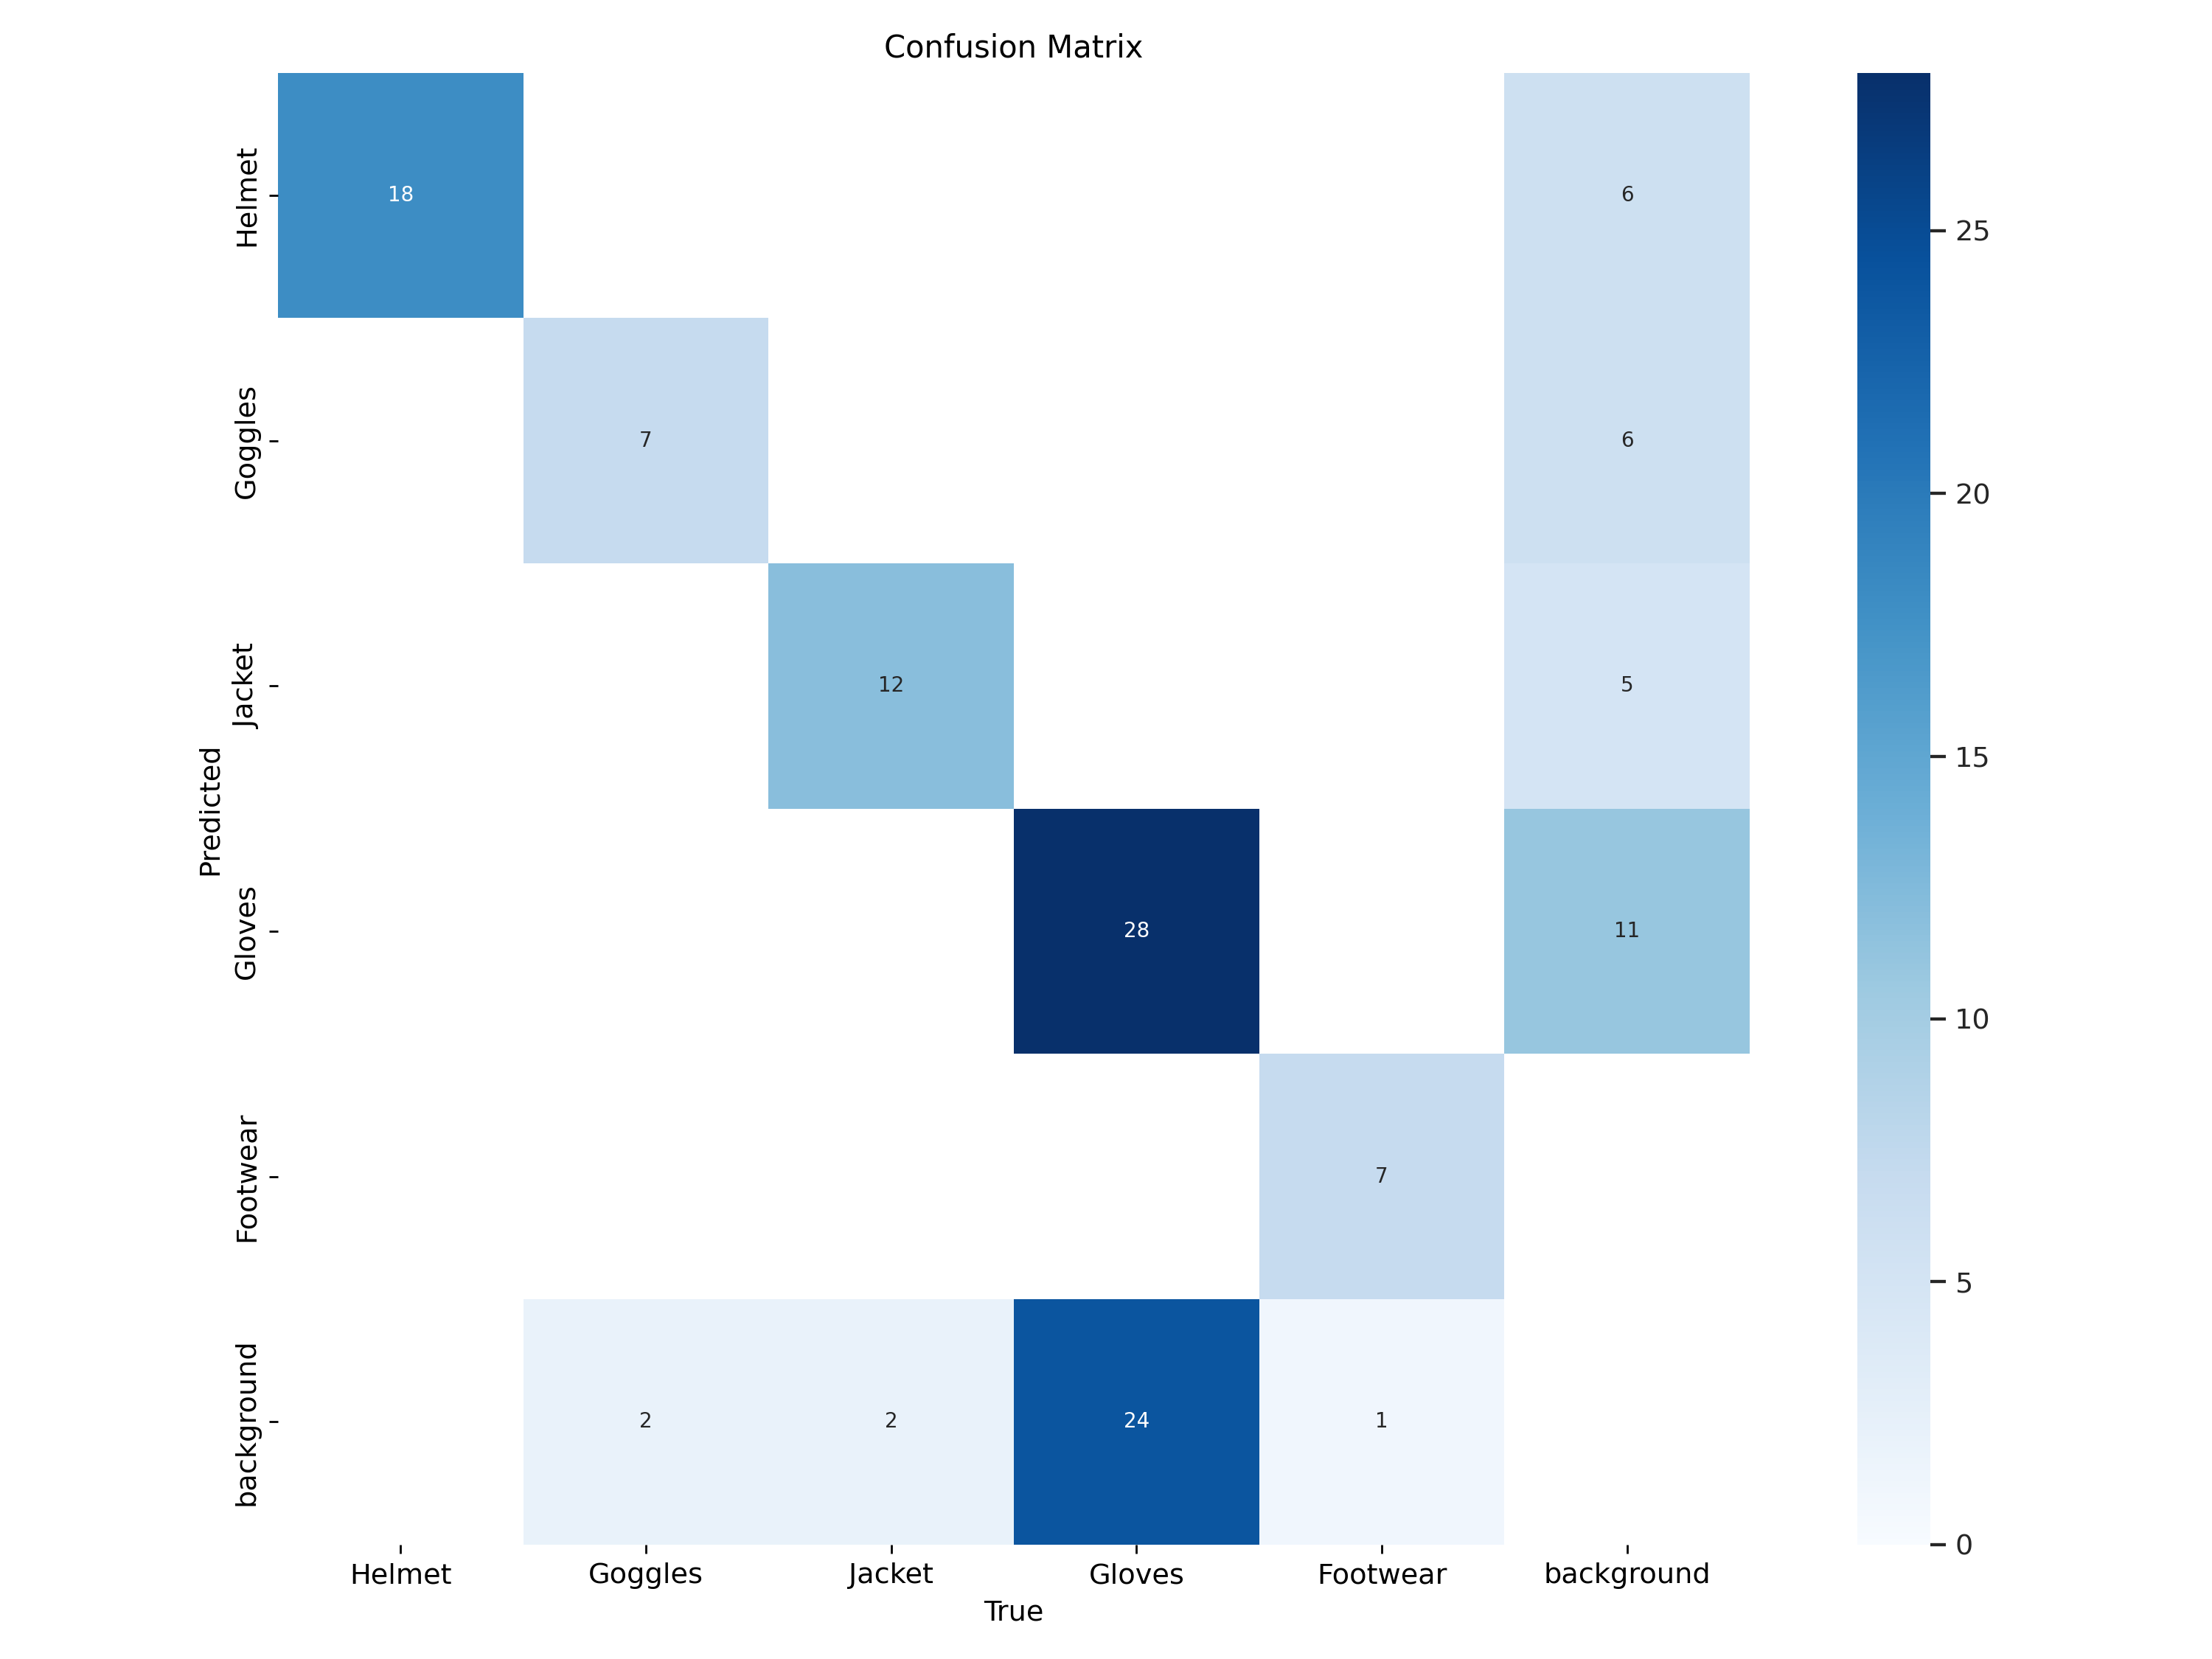

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

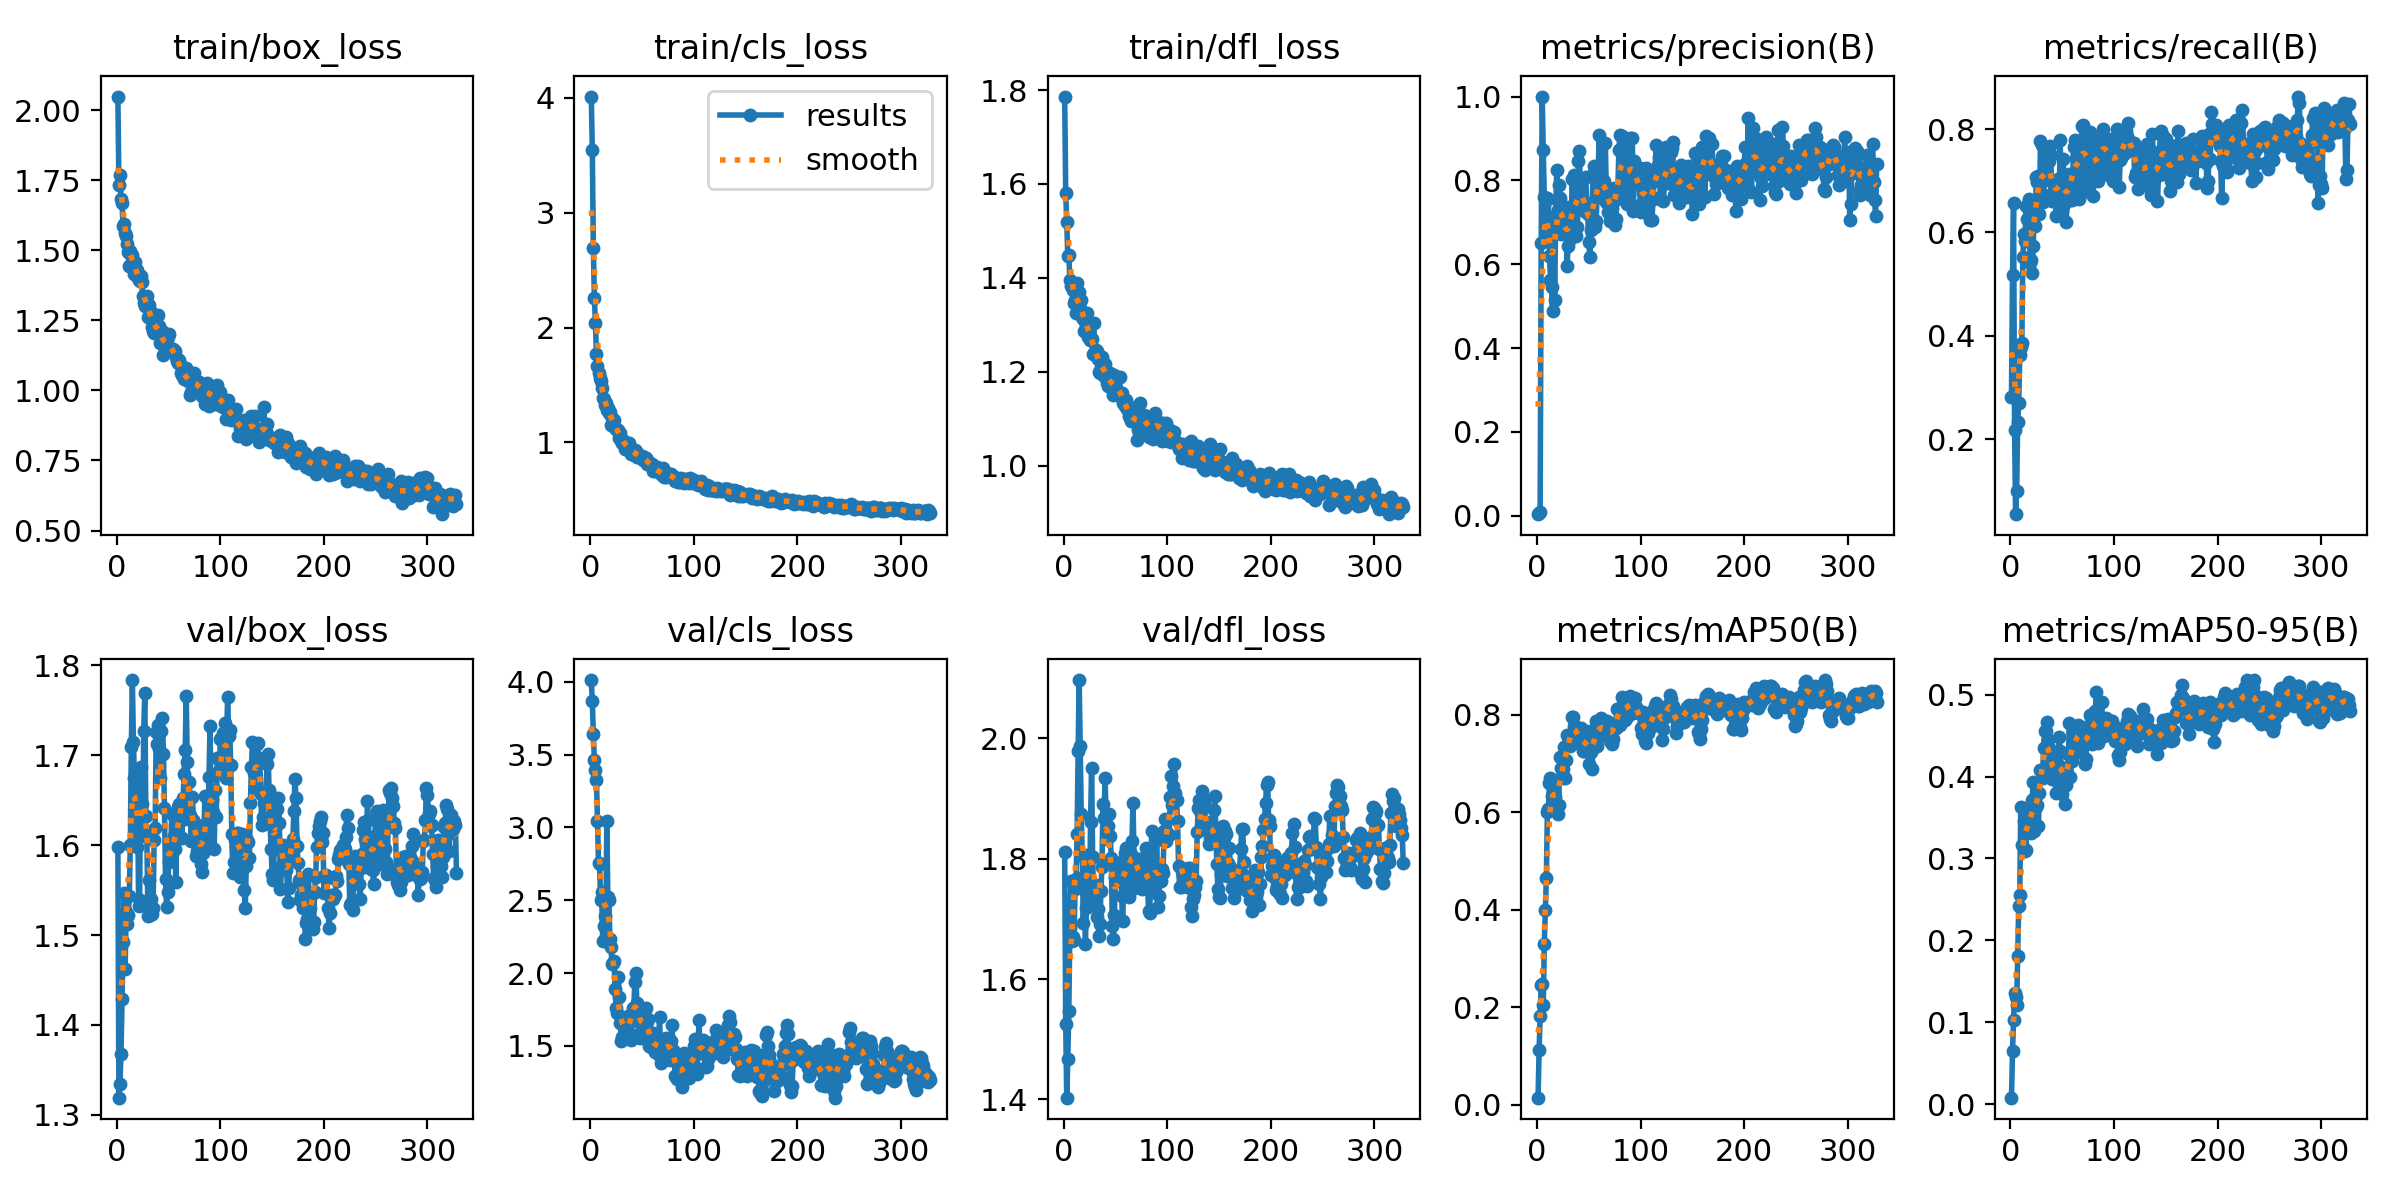

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

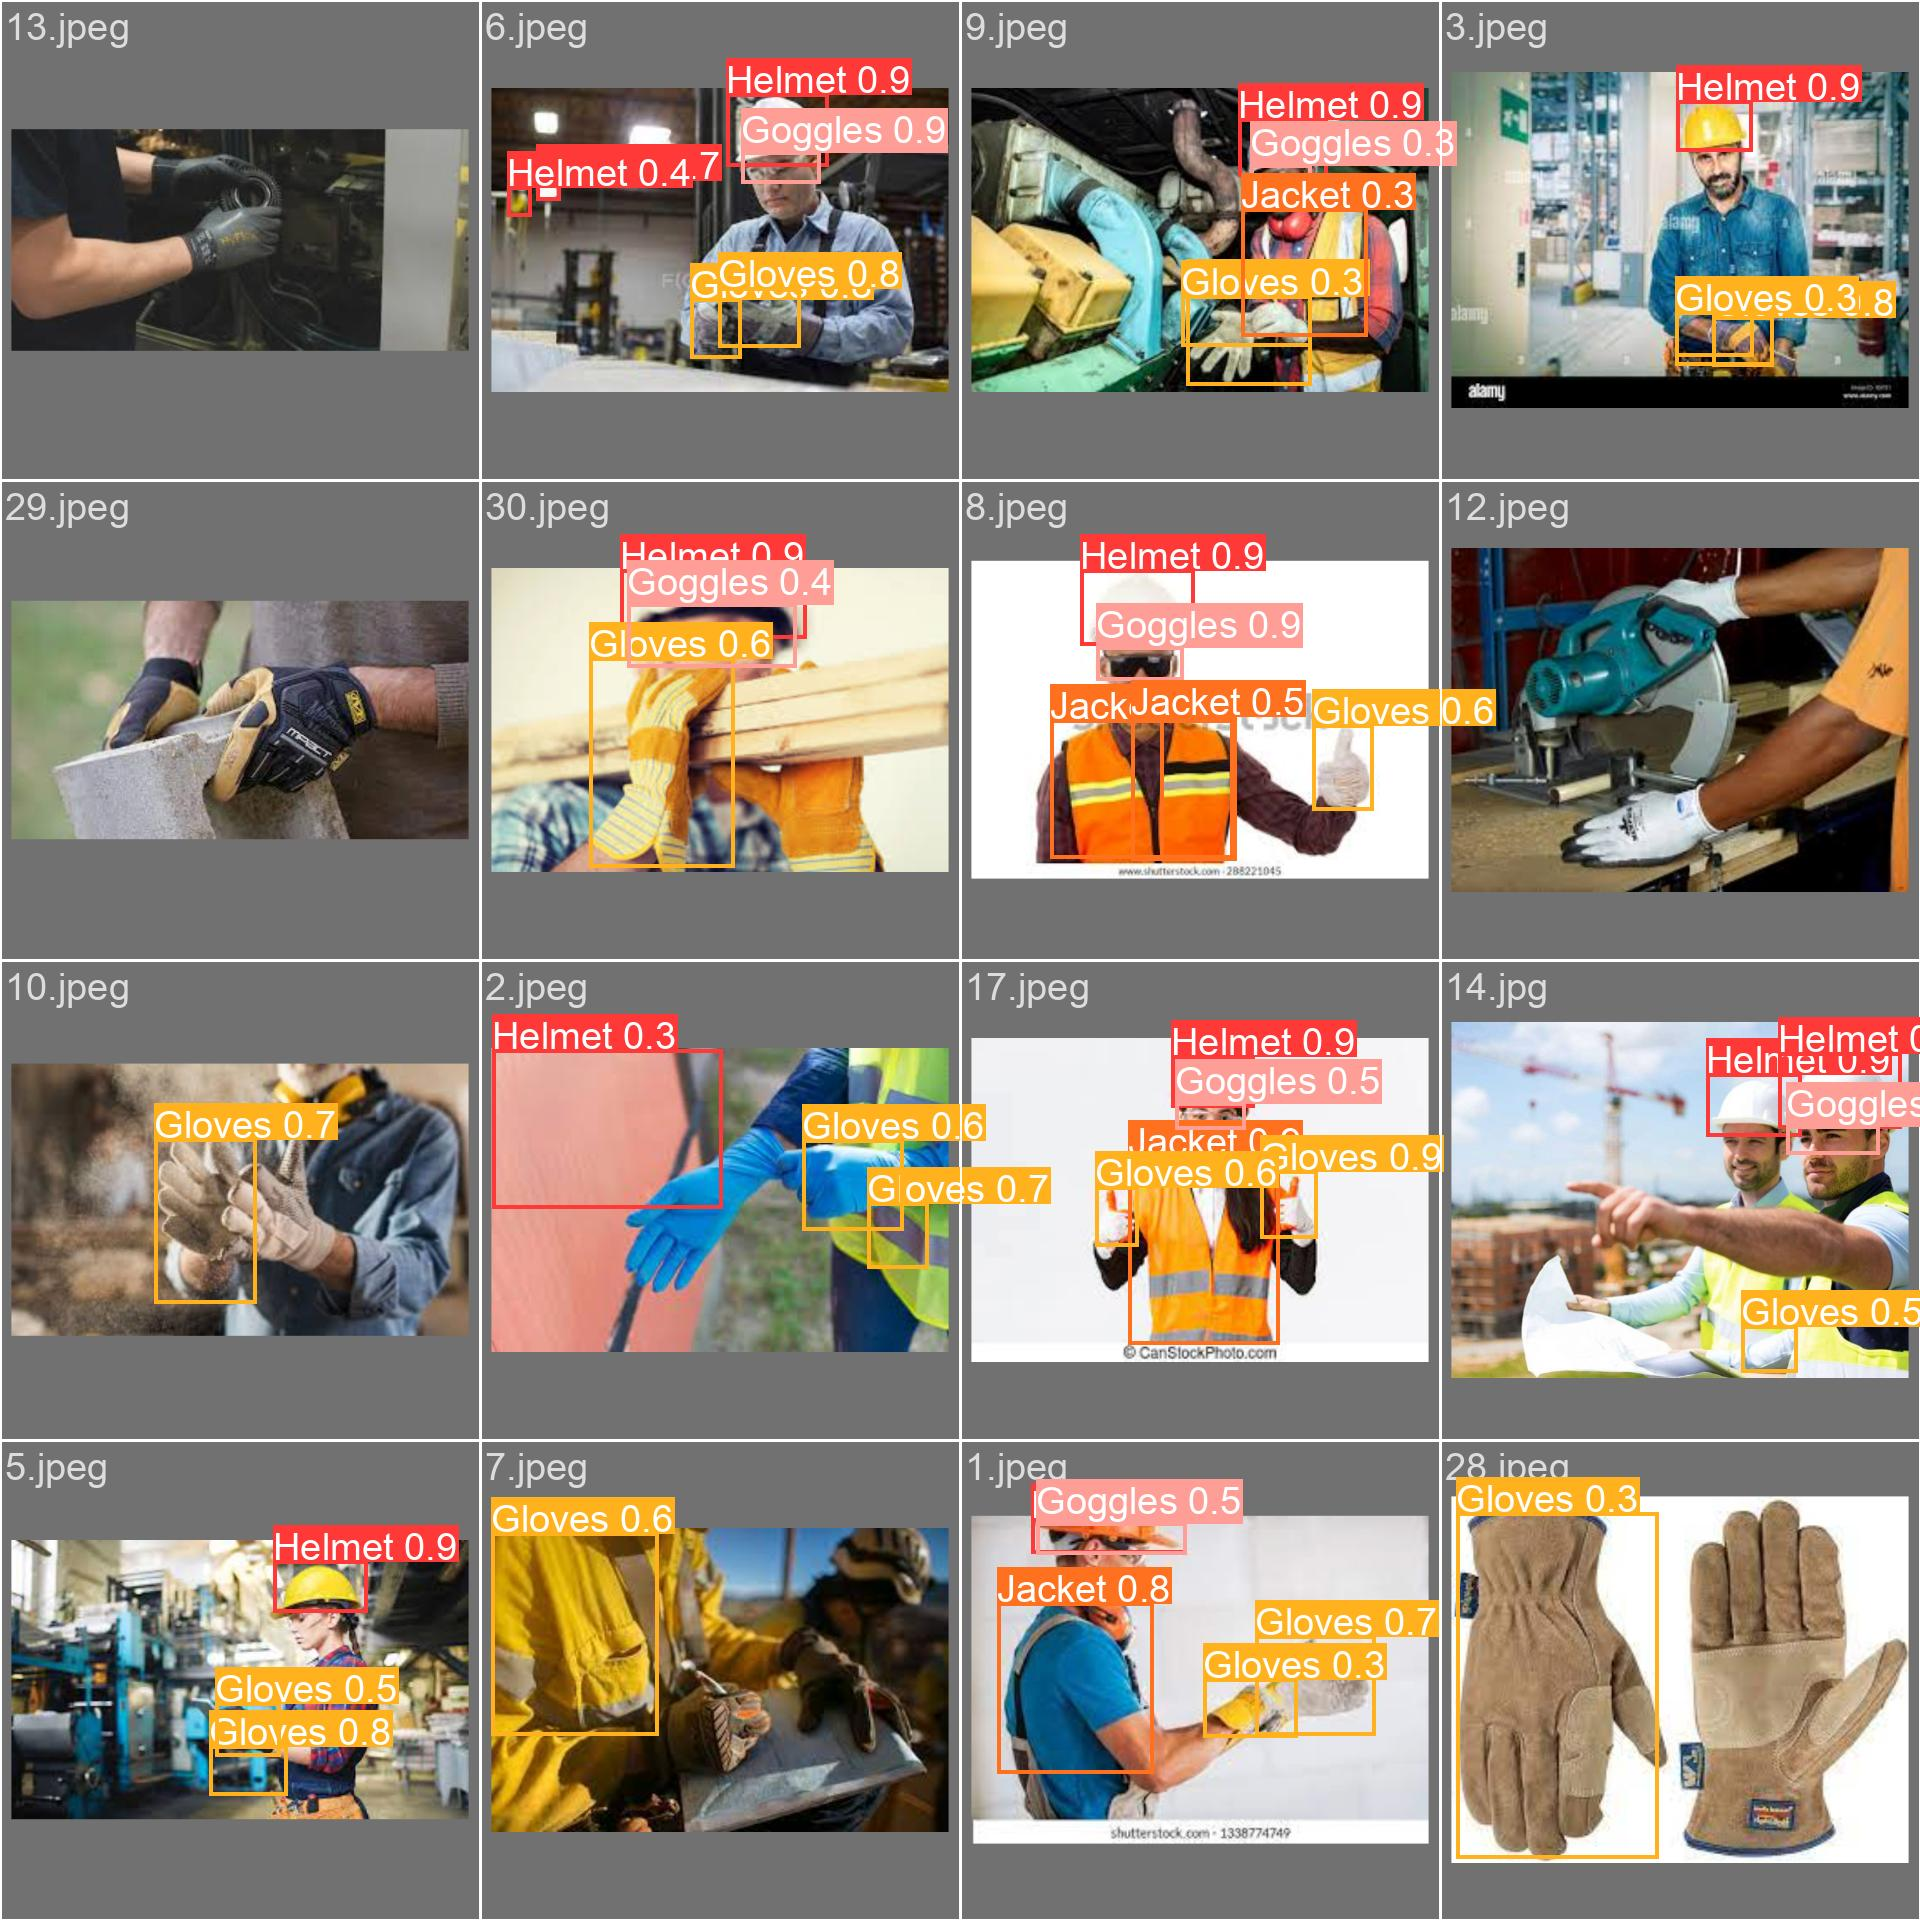

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
# ### Copy results ###

!scp -r /content/runs '/content/gdrive/MyDrive/YOLOv8'